<a href="https://colab.research.google.com/github/uttarakhatri/Sleep-stage-EEG-transitions/blob/main/Artifact_rejection_ICA_ISRUC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mne
import mne

     |████████████████████████████████| 7.0MB 13.5MB/s 


Extracting EDF parameters from /content/drive/My Drive/sleep/ISRUC_sleep_dataset/72/72/72.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
<Info | 7 non-empty values
 bads: []
 ch_names: E1-M2, E2-M1, F3-M2, C3-M2, O1-M2, F4-M1, C4-M1, O2-M1, 24, 25, ...
 chs: 20 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 100.0 Hz
 meas_date: 2012-02-16 23:54:00 UTC
 nchan: 20
 projs: []
 sfreq: 200.0 Hz
>


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)


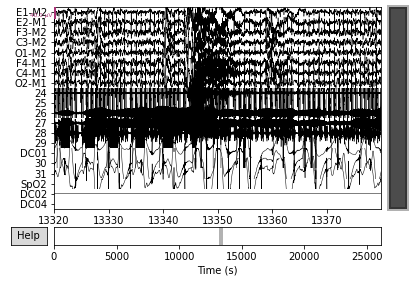

In [ ]:
for sub in range(72,73):
  raw= mne.io.read_raw_edf('/content/drive/My Drive/sleep/ISRUC_sleep_dataset/'+ str(sub)+'/'+ str(sub)+ '/'+str(sub)+'.edf')
  print(raw.info)
  #raw = mne.pick_channels(raw.info)
  raw.plot(start= (444*30), duration=60,remove_dc=False)

  df=raw.to_data_frame()
  #print(df)
  import numpy as np
  import pandas as pd
  sub2arr= df.to_numpy()
  #print (np.transpose(sub2arr))
  # sub=np.transpose(sub2arr)
  #np.save( '/content/drive/My Drive/sleep/ISRUC_sleep_dataset/'   + str(sub) +'/'+ str(sub) + '.npy', np.transpose(sub2arr))
  #mne.viz.plot_raw_psd(raw, dB=False, fmax=30, tmax=60000, picks=[2,1])

In [ ]:
raw.drop_channels(['24','25','26','27','28','29','DC01','30','31','SpO2','DC02','DC04'])
raw.set_channel_types({'E1-M2' : 'eeg', 'E2-M1': 'eeg'})
filt_raw = raw.copy()
filt_raw.load_data().filter(l_freq=1., h_freq=None)

Reading 0 ... 5231999  =      0.000 ... 26159.995 secs...
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 661 samples (3.305 sec)



<RawEDF | 72.edf, 8 x 5232000 (26160.0 s), ~319.3 MB, data loaded>

In [ ]:
from mne import preprocessing
ica = mne.preprocessing.ICA(method='fastica',random_state=97, max_iter=1000)
icafit=ica.fit(filt_raw)
print(icafit.n_iter_)

Fitting ICA to data using 8 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 8 components
Fitting ICA took 67.2s.
38


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)


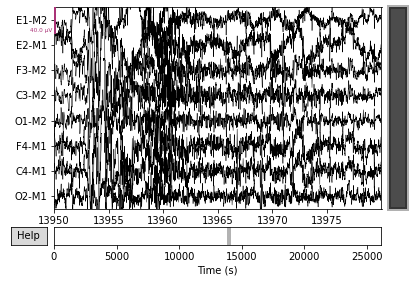

Creating RawArray with float64 data, n_channels=8, n_times=5232000
    Range : 0 ... 5231999 =      0.000 ... 26159.995 secs
Ready.


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)


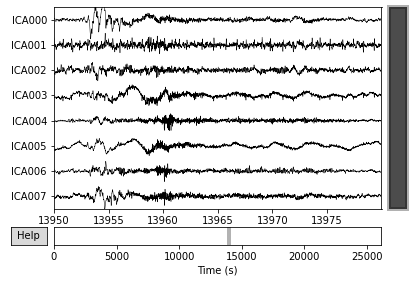

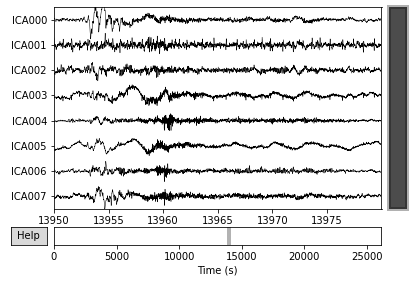

In [ ]:
#raw.load_data()
raw.plot(duration=30,start= 465*30,remove_dc=False)
ica.plot_sources(raw,start= 465*30, stop= 466*30)
#rawsour=ica.get_sources(raw,start= 10995, stop=11005, add_channels= ['LOC-A2','ROC-A1'])
#ica.get_components()



Using EOG channel: E1-M2
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2000 samples (10.000 sec)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz

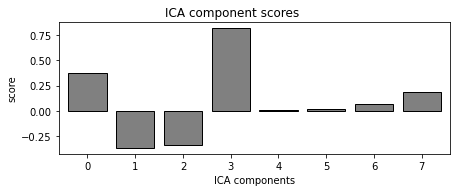

[3, 0, 1, 2]
Using EOG channel: E2-M1
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2000 samples (10.000 sec)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff freque

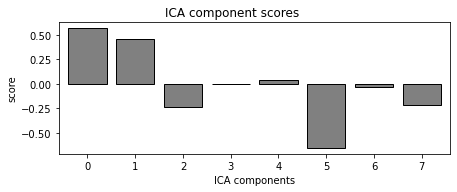

[5, 0, 1, 2, 7, 4]


In [ ]:
eog_indices, eog_scores = ica.find_bads_eog(raw, ch_name= 'E1-M2', threshold=1.0)
ica.plot_scores(eog_scores)
print(eog_indices)
eog_indices, eog_scores = ica.find_bads_eog(raw, ch_name= 'E2-M1', threshold=1.0)
ica.plot_scores(eog_scores)
print(eog_indices)

Reading 0 ... 5231999  =      0.000 ... 26159.995 secs...
Applying ICA to Raw instance
    Transforming to ICA space (8 components)
    Zeroing out 3 ICA components
    Projecting back using 8 PCA components


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)


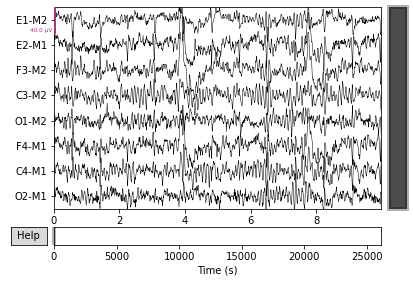

recons


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)


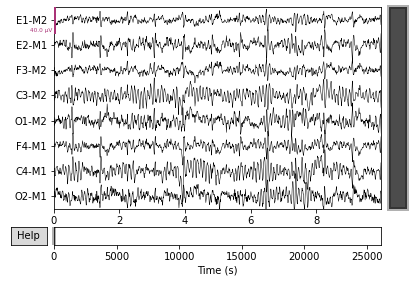

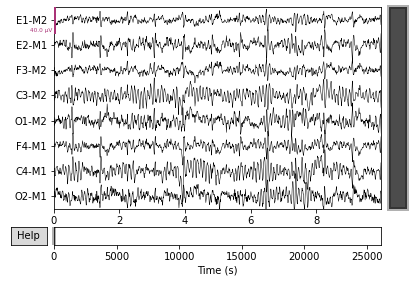

In [ ]:
# ica.apply() changes the Raw object in-place, so let's make a copy first:
raw.load_data()
chnames= [0,3,5]
ica.exclude= chnames
reconst_raw = raw.copy()
ica.apply(reconst_raw, exclude= chnames)


raw.plot()
print('recons')
reconst_raw.plot(start=0.0, duration= 10.0)

Applying ICA to Raw instance
    Transforming to ICA space (9 components)
    Zeroing out 3 ICA components
    Projecting back using 9 PCA components


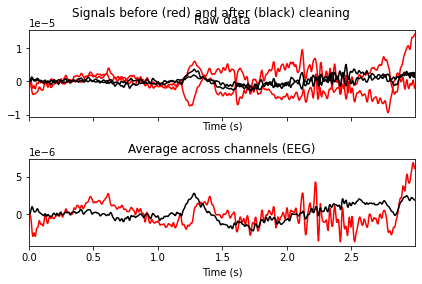

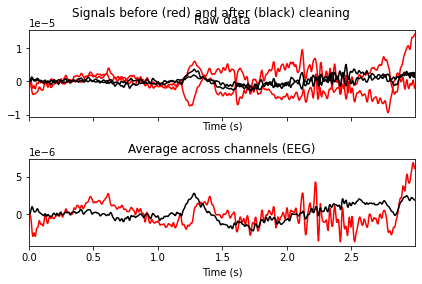

In [ ]:
raw.set_channel_types({'LOC-A2' : 'eeg', 'ROC-A1': 'eeg', 'X2': 'ecg', 'F3-A2':'ecg', 'F4-A1':'ecg', 'C3-A2':'ecg', 'O1-A2':'ecg', 'C4-A1':'ecg', 'O2-A1':'ecg'})
#raw.load_data()
#raw.set_channel_types({'LOC-A2' : 'eog', 'ROC-A1': 'eog', 'X2': 'ecg', 'F3-A2':'eeg', 'F4-A1':'eeg', 'C3-A2':'eeg', 'O1-A2':'eeg', 'C4-A1':'eeg', 'O2-A1':'eeg'})
ica.plot_overlay(raw, picks=['eeg'])
#del reconst_raw
# reconst_raw.plot()
# raw.set_channel_types({'LOC-A2' : 'eeg', 'ROC-A1': 'eeg', 'X2': 'ecg', 'F3-A2':'eeg', 'F4-A1':'eeg', 'C3-A2':'eeg', 'O1-A2':'eeg', 'C4-A1':'eeg', 'O2-A1':'eeg'})
# del reconst_raw
# raw.plot()
#ica.apply(reconst_raw, exclude= [0,7,4])
# ica.apply(reconst_raw, exclude= [0,3,7])
# ica.apply(reconst_raw, exclude= [0,8,7])


In [ ]:
_df=reconst_raw.to_data_frame()
print(_df)
import numpy as np
import pandas as pd
sub2arr= df.to_numpy()
np.save('/content/drive/My Drive/sleep/ISRUC_sleep_dataset/72/72_ica_pc.npy',np.transpose(sub2arr))

df=raw.to_data_frame()
print(df)
import pandas as pd
s2arr= df.to_numpy()
s2arr1= np.transpose(s2arr)

             time      E1-M2      E2-M1  ...      F4-M1      C4-M1      O2-M1
0               0   0.008975   0.614273  ...   0.426740   0.783057  -0.191072
1               5   0.040651   2.802771  ...   1.978667   3.359910  -0.961443
2              10  -0.367337   4.873678  ...   3.300661   4.742106  -0.919919
3              15  -1.851621   4.150352  ...   2.443176   1.216896   2.032007
4              20  -3.747182   1.759176  ...   0.257051  -5.006230   6.323417
...           ...        ...        ...  ...        ...        ...        ...
5231995  26159975  11.679889 -14.695182  ... -11.746249  -9.922752 -16.565444
5231996  26159980  11.707276 -18.029900  ... -14.108527 -11.569695 -14.934769
5231997  26159985   8.801934 -14.631250  ... -11.871054 -10.759121 -10.631218
5231998  26159990   3.844398  -5.770710  ...  -4.987557  -4.866263  -4.866331
5231999  26159995  -0.870762   3.731304  ...   3.320130   3.554422  -0.255428

[5232000 rows x 9 columns]
             time      E1-M2      E2

In [ ]:
sub=np.transpose(sub2arr)
import matplotlib.pyplot as plt
st= 10995*200
sto=11005*200
fig, axs = plt.subplots(4)
axs[0].plot(sub[0][st:sto],sub[1][st:sto], label='lefteye')
axs[1].plot(sub[0][st:sto],sub[2][st:sto], label='righteye')
axs[2].plot(sub[0][st:sto],sub[3][st:sto] , label='F3')
axs[3].plot(sub[0][st:sto],sub[6][st:sto], label='F4')
plt.legend()
plt.show()

In [ ]:
mne.viz.plot_raw_psd(ica.get_sources(raw), picks=[2,4], fmax=15, tmin=414*30, tmax=415*30)
print('raw')
mne.viz.plot_raw_psd(raw, picks=[2,6], fmax=15,tmin=414*30, tmax=415*30)

In [ ]:
raw.set_channel_types({'LOC-A2' : 'eog', 'ROC-A1': 'eog', 'X2': 'ecg'})
ecg_epochs = mne.preprocessing.create_ecg_epochs(raw)
ecg_epochs.plot_image(combine='mean')
eog_epochs= mne.preprocessing.create_eog_epochs(raw)
eog_epochs.plot_image(combine='mean')

In [ ]:
import matplotlib.pyplot as plt
#s2= np.transpose(sub2arr)
mean_raw=[]
mean_ica=[]
for i in range(5646000):
  mean_raw.append(np.mean(s2arr[i][1:]))
  mean_ica.append(np.mean(sub2arr[i][1:]))



NameError: ignored

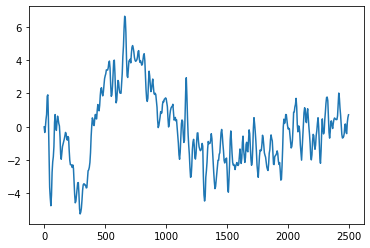

In [ ]:
plt.plot(s2arr1[0][:500], mean_raw[:500] ,label= 'raw')
plt.plot(s2[0][:500],mean_ica[:500],label= 'ica')


plt.legend()
plt.show()
print(len(s2[0]))

In [ ]:
print(s2[4])
print(s2[9])

[6.31451366e-06 4.83677799e-02 2.95517340e-01 ... 1.60579362e+00
 1.72462471e+00 2.00035635e+00]
[-5.31492806e-05 -1.00900145e-02 -8.46981078e-02 ...  1.94098139e-01
  1.16325950e-01  1.34268601e-02]


In [ ]:
pip install pyedflib

     |████████████████████████████████| 1.2MB 5.2MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for pyedflib: filename=pyEDFlib-0.1.19-cp36-cp36m-linux_x86_64.whl size=925704 sha256=6dfc67397cd338b06c8c17028d726e5cba53847fa48b31268c4a45364f670c7a
  Stored in directory: /root/.cache/pip/wheels/1f/b7/24/a565e4f7471617165f1b040651b52d87ad1885aaf32e02d4f9
Successfully built pyedflib


In [ ]:

import pyedflib
from pyedflib import highlevel # new high-level interface
from pyedflib import FILETYPE_BDF, FILETYPE_BDFPLUS, FILETYPE_EDF, FILETYPE_EDFPLUS
from datetime import datetime, timezone, timedelta
import mne
import os

def _stamp_to_dt(utc_stamp):
    """Convert timestamp to datetime object in Windows-friendly way."""
    if 'datetime' in str(type(utc_stamp)): return utc_stamp
    # The min on windows is 86400
    stamp = [int(s) for s in utc_stamp]
    if len(stamp) == 1:  # In case there is no microseconds information
        stamp.append(0)
    return (datetime.fromtimestamp(0, tz=timezone.utc) +
            timedelta(0, stamp[0], stamp[1]))  # day, sec, μs


def write_mne_edf(mne_raw, fname, picks=None, tmin=0, tmax=None,
                  overwrite=False):
    """
    Saves the raw content of an MNE.io.Raw and its subclasses to
    a file using the EDF+/BDF filetype
    pyEDFlib is used to save the raw contents of the RawArray to disk
    Parameters
    ----------
    mne_raw : mne.io.Raw
        An object with super class mne.io.Raw that contains the data
        to save
    fname : string
        File name of the new dataset. This has to be a new filename
        unless data have been preloaded. Filenames should end with .edf
    picks : array-like of int | None
        Indices of channels to include. If None all channels are kept.
    tmin : float | None
        Time in seconds of first sample to save. If None first sample
        is used.
    tmax : float | None
        Time in seconds of last sample to save. If None last sample
        is used.
    overwrite : bool
        If True, the destination file (if it exists) will be overwritten.
        If False (default), an error will be raised if the file exists.
    """
    if not issubclass(type(mne_raw), mne.io.BaseRaw):
        raise TypeError('Must be mne.io.Raw type')
    if not overwrite and os.path.exists(fname):
        raise OSError('File already exists. No overwrite.')

    # static settings
    has_annotations = True if len(mne_raw.annotations)>0 else False
    if os.path.splitext(fname)[-1] == '.edf':
        file_type = FILETYPE_EDFPLUS if has_annotations else FILETYPE_EDF
        dmin, dmax = -32768, 32767
    else:
        file_type = FILETYPE_BDFPLUS if has_annotations else FILETYPE_BDF
        dmin, dmax = -8388608, 8388607

    print('saving to {}, filetype {}'.format(fname, file_type))
    sfreq = mne_raw.info['sfreq']
    date = _stamp_to_dt(mne_raw.info['meas_date'])

    if tmin:
        date += timedelta(seconds=tmin)
    # no conversion necessary, as pyedflib can handle datetime.
    #date = date.strftime('%d %b %Y %H:%M:%S')
    first_sample = int(sfreq*tmin)
    last_sample  = int(sfreq*tmax) if tmax is not None else None


    # convert data
    channels = mne_raw.get_data(picks,
                                start = first_sample,
                                stop  = last_sample)

    # convert to microvolts to scale up precision
    channels *= 1e6

    # set conversion parameters
    n_channels = len(channels)

    # create channel from this
    try:
        f = pyedflib.EdfWriter(fname,
                               n_channels=n_channels,
                               file_type=file_type)

        channel_info = []

        ch_idx = range(n_channels) if picks is None else picks
        keys = list(mne_raw._orig_units.keys())
        for i in ch_idx:
            try:
                ch_dict = {'label': mne_raw.ch_names[i],
                           'dimension': mne_raw._orig_units[keys[i]],
                           'sample_rate': mne_raw._raw_extras[0]['n_samps'][i],
                           'physical_min': mne_raw._raw_extras[0]['physical_min'][i],
                           'physical_max': mne_raw._raw_extras[0]['physical_max'][i],
                           'digital_min':  mne_raw._raw_extras[0]['digital_min'][i],
                           'digital_max':  mne_raw._raw_extras[0]['digital_max'][i],
                           'transducer': '',
                           'prefilter': ''}
            except:
                ch_dict = {'label': mne_raw.ch_names[i],
                           'dimension': mne_raw._orig_units[keys[i]],
                           'sample_rate': sfreq,
                           'physical_min': channels.min(),
                           'physical_max': channels.max(),
                           'digital_min':  dmin,
                           'digital_max':  dmax,
                           'transducer': '',
                           'prefilter': ''}

            channel_info.append(ch_dict)
        f.setPatientCode(mne_raw._raw_extras[0]['subject_info']['id'])
        f.setPatientName(mne_raw._raw_extras[0]['subject_info']['name'])
        f.setTechnician('mne-gist-save-edf-skjerns')
        f.setSignalHeaders(channel_info)
        f.setStartdatetime(date)
        f.writeSamples(channels)
        for annotation in mne_raw.annotations:
            onset = annotation['onset']
            duration = annotation['duration']
            description = annotation['description']
            f.writeAnnotation(onset, duration, description)

    except Exception as e:
        raise e
    finally:
        f.close()
    return True

In [ ]:
write_mne_edf(reconst_raw1, 'sub2_ica')

saving to sub2_ica, filetype 2


True

In [ ]:
raw1= mne.io.read_raw_edf('sub2_ica.edf')
print(raw1.info)

Extracting EDF parameters from /content/sub2_ica.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
<Info | 7 non-empty values
 bads: []
 ch_names: LOC-A2, ROC-A1, F3-A2, C3-A2, O1-A2, F4-A1, C4-A1, O2-A1, X2
 chs: 9 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 100.0 Hz
 meas_date: 2009-04-25 00:21:00 UTC
 nchan: 9
 projs: []
 sfreq: 200.0 Hz
>


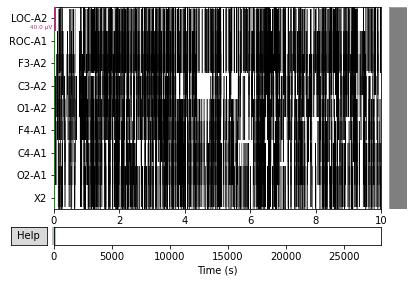

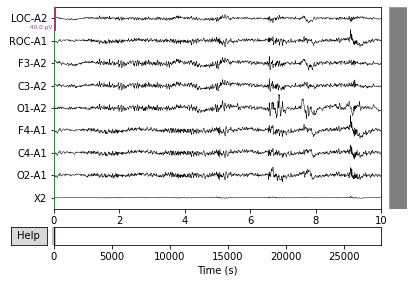

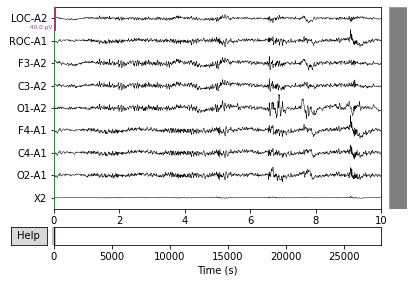

In [ ]:
raw1.plot()
raw.plot()

Transforming to ICA space (9 components)
Zeroing out 1 ICA component


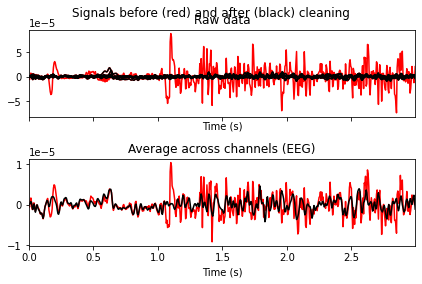

Transforming to ICA space (9 components)
Zeroing out 3 ICA components


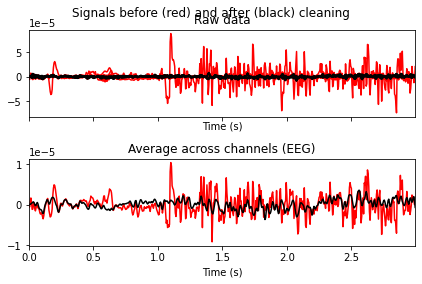

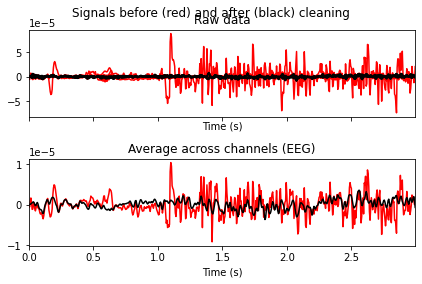

In [ ]:
# blinks
ica.plot_overlay(raw, exclude=[0], picks= 'eeg')
# heartbeats
ica.plot_overlay(raw, exclude=[5,6], picks='eeg')



In [ ]:
from mne import preprocessing as pre
eog_evoked = pre.create_eog_epochs(raw).average()
eog_evoked.apply_baseline(baseline=(None, -0.2))
eog_evoked.plot_joint()

In [ ]:
#ica.exclude = [0]
# find which ICs match the EOG pattern


# print(eog_scores)
# ica.plot_sources(raw)
# ica.plot_scores(eog_scores)


# barplot of ICA component "EOG match" scores
#ica.plot_scores(eog_scores)

# plot diagnostics
#ica.plot_properties(raw, picks=eog_indices)

# plot ICs applied to raw data, with EOG matches highlighted
#ica.plot_sources(raw)

# plot ICs applied to the averaged EOG epochs, with EOG matches highlighted
#ica.plot_sources(eog_evoked)

Using channel LOC-A2 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2000 samples (10.000 sec)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequenc